In [2]:
import pandas as pd

### Read the data

In [7]:
df=pd.read_excel("superstore_sales.xlsx")

### Analysis the data

In [9]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [8]:
df.shape[0]

51290

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

### Check for null values

In [17]:
df[df.isna().any(axis=1)]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


In [18]:
df.count()

order_id          51290
order_date        51290
ship_date         51290
ship_mode         51290
customer_name     51290
segment           51290
state             51290
country           51290
market            51290
region            51290
product_id        51290
category          51290
sub_category      51290
product_name      51290
sales             51290
quantity          51290
discount          51290
profit            51290
shipping_cost     51290
order_priority    51290
year              51290
dtype: int64

### Check for duplicates

In [21]:
df[df.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


### Total region

In [24]:
df['region'].nunique()

13

In [26]:
df['region'].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'South', 'Caribbean', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

In [27]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [29]:
df['customer_name'].nunique()

795

In [34]:
df.groupby('customer_name')['sales'].sum().reset_index().sort_values('sales',ascending=False)

,customer_name,sales
758,Tom Ashbrook,40488.07080
731,Tamara Chand,37457.33300
313,Greg Tran,35550.95428
157,Christopher Conant,35187.07640
687,Sean Miller,35170.93296
...,...,...
529,Michael Oakman,5460.58400
724,Sung Shariari,5328.46480
419,Karen Seio,5324.97318
135,Catherine Glotzbach,4115.20800


In [36]:
df['product_id'].nunique()

10292

In [37]:
df['segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [39]:
df['market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'Canada', 'LATAM', 'US'],
      dtype=object)

In [41]:
df.groupby(['market','year'])['sales'].sum()

market  year
APAC    2011    6.392453e+05
        2012    7.627193e+05
        2013    9.745809e+05
        2014    1.209199e+06
Africa  2011    1.271873e+05
        2012    1.444807e+05
        2013    2.290688e+05
        2014    2.830364e+05
Canada  2011    8.509110e+03
        2012    1.609680e+04
        2013    1.916115e+04
        2014    2.316111e+04
EMEA    2011    1.364203e+05
        2012    1.634144e+05
        2013    2.046407e+05
        2014    3.016859e+05
EU      2011    4.787433e+05
        2012    6.554617e+05
        2013    7.616804e+05
        2014    1.042204e+06
LATAM   2011    3.850982e+05
        2012    4.647333e+05
        2013    6.081408e+05
        2014    7.066329e+05
US      2011    4.842475e+05
        2012    4.705325e+05
        2013    6.084738e+05
        2014    7.339470e+05
Name: sales, dtype: float64

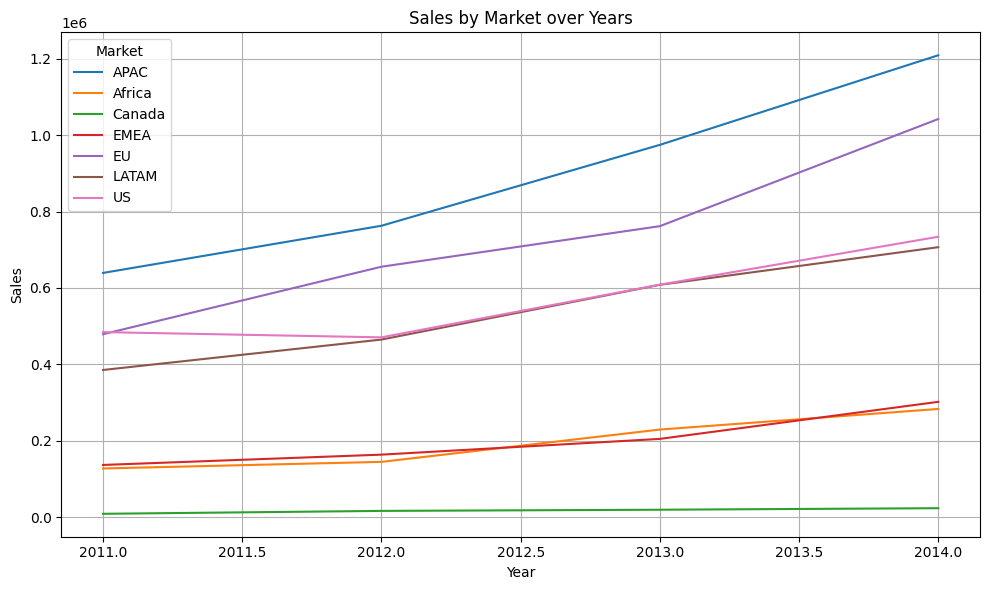

In [43]:

import matplotlib.pyplot as plt

df_grouped = df.groupby(['market', 'year'])['sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop through each country (market) and plot
for market in df_grouped['market'].unique():
    market_data = df_grouped[df_grouped['market'] == market]
    plt.plot(market_data['year'], market_data['sales'], label=market)

# Add labels and title
plt.title('Sales by Market over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Market')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()